# Leading Indian Bank & CIBIL Real-World Dataset

### ❓ <u>Question to Investigate: What factors most influence credit scores?<u>
#### Let's analyze the importance of different features in predicting credit scores...!  💥
#### Process: 
1) Gather
2) Visually Investigate
3) Prepare
4) Correlation Analysis
5) Multicollinearity
6) Modelling (inc. conudcting fine-tuning and creating an ensemble model)
7) Evaluate
8) Analyse Feature Importance 

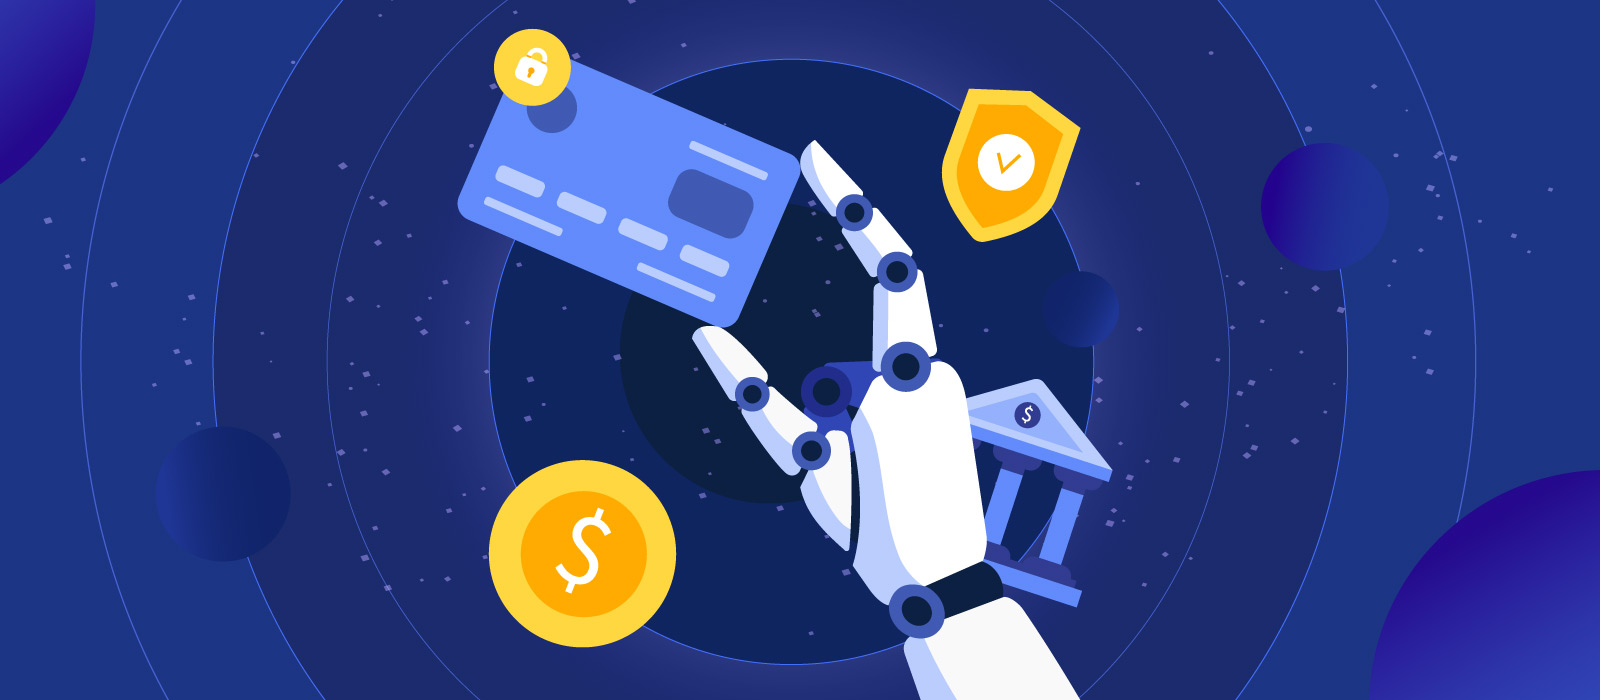

In [1]:
from IPython import display
display.Image("/Users/maxsmith/env_bank/Images_bank/bank_cover.jpg")

## 1) Gather the data

In [2]:
## Let's import some libraries

In [3]:
#### !pip install openpyxl

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ext_df = pd.read_excel("/Users/maxsmith/env_bank/Data/External_Cibil_Dataset.xlsx")
int_df = pd.read_excel("/Users/maxsmith/env_bank/Data/Internal_Bank_Dataset.xlsx")
test_df = pd.read_excel("/Users/maxsmith/env_bank/Data/Unseen_Dataset.xlsx")

In [6]:
print(ext_df.columns)

Index(['PROSPECTID', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Fla

In [7]:
print(int_df.columns)

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL'],
      dtype='object')


In [8]:
print(test_df.columns)

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'MARITALSTATUS',
       'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2'],
      dtype='object')


##### Let's merge these badboys

In [9]:
bank_df = pd.merge(int_df, ext_df, how='left', left_on='PROSPECTID', right_on='PROSPECTID')
bank_df.set_index('PROSPECTID')

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
PROSPECTID,,,,,,,,,,,,,,,,,,,,,
1,5,4,1,0,0,0.000,0.00,0.200,0.800,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
2,1,0,1,0,0,0.000,0.00,1.000,0.000,1,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
3,8,0,8,1,0,0.125,0.00,1.000,0.000,2,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
4,1,0,1,1,0,1.000,0.00,1.000,0.000,1,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
5,3,2,1,0,0,0.000,0.00,0.333,0.667,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51332,3,0,3,1,0,0.333,0.00,1.000,0.000,1,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51333,4,2,2,0,1,0.000,0.25,0.500,0.500,2,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51334,2,1,1,1,1,0.500,0.50,0.500,0.500,2,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3


In [10]:
print(len(bank_df))
print(len(bank_df.columns))

51336
87


In [11]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   Total_TL                      51336 non-null  int64  
 2   Tot_Closed_TL                 51336 non-null  int64  
 3   Tot_Active_TL                 51336 non-null  int64  
 4   Total_TL_opened_L6M           51336 non-null  int64  
 5   Tot_TL_closed_L6M             51336 non-null  int64  
 6   pct_tl_open_L6M               51336 non-null  float64
 7   pct_tl_closed_L6M             51336 non-null  float64
 8   pct_active_tl                 51336 non-null  float64
 9   pct_closed_tl                 51336 non-null  float64
 10  Total_TL_opened_L12M          51336 non-null  int64  
 11  Tot_TL_closed_L12M            51336 non-null  int64  
 12  pct_tl_open_L12M              51336 non-null  float64
 13  p

## 2) Visual Investigation

### Credit Score

<Axes: xlabel='AGE', ylabel='Credit_Score'>

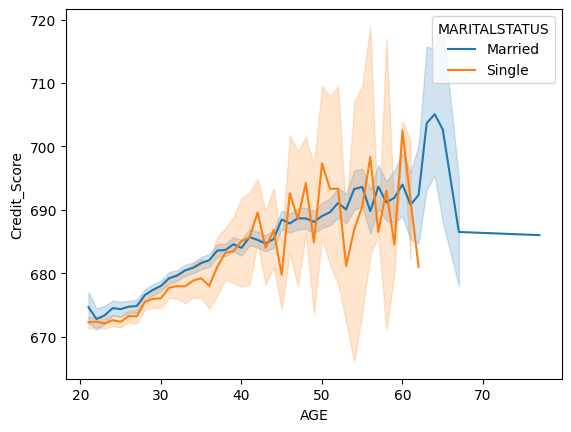

In [12]:
# Credit Score by age by marital status
sns.lineplot(data=bank_df, y='Credit_Score', x='AGE', hue='MARITALSTATUS')

In [13]:
a = bank_df[['MARITALSTATUS']].value_counts()
print(a)

MARITALSTATUS
Married          37752
Single           13584
Name: count, dtype: int64


In [14]:
a = bank_df[['EDUCATION']].value_counts()
print(a)

EDUCATION     
GRADUATE          16673
12TH              14467
SSC                9276
UNDER GRADUATE     5492
OTHERS             2917
POST-GRADUATE      2242
PROFESSIONAL        269
Name: count, dtype: int64


<Axes: xlabel='EDUCATION', ylabel='Credit_Score'>

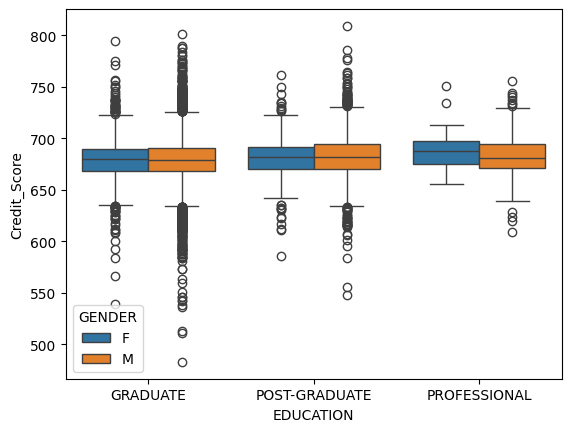

In [15]:
# Credit Score boxplot by education by gender
ed_cat = ['GRADUATE','POST-GRADUATE','PROFESSIONAL']
ed_df = bank_df.loc[bank_df['EDUCATION'].isin(ed_cat)]
sns.boxplot(data=ed_df, y='Credit_Score', x='EDUCATION', hue ='GENDER')

In [16]:
## Add into %

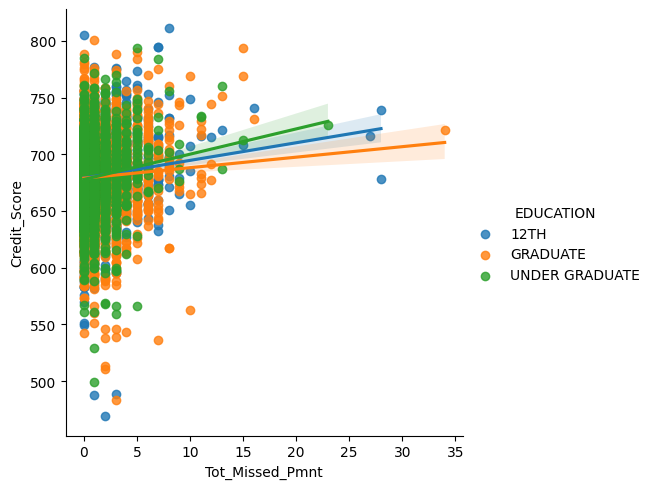

In [17]:
# Credit Score by Time With Current Employee and Gender 
education_3 = ['12TH', 'UNDER GRADUATE','GRADUATE']
ed_df2 = bank_df.loc[bank_df['EDUCATION'].isin(education_3)]
sns.lmplot(data=ed_df2, y='Credit_Score', x='Tot_Missed_Pmnt', hue='EDUCATION', fit_reg=True)

## 3) Data Preparation

In [18]:
bank_labels = bank_df['Credit_Score'].copy()
bank_df.drop('Credit_Score',axis=1)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,P2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.0,9.900,0,0,others,others,P2
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,P4
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.0,0.0,0.520,0,0,others,others,P1
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,P3
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,P2


In [19]:
# Checking for nulls
bank_df.isnull().any().sum()

0

In [20]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
## Numerical Pipeline (Robust Scaler)
num_pipeline = Pipeline([
    ('robust_scaler',RobustScaler()),
])

In [22]:
from sklearn.preprocessing import FunctionTransformer

# Assuming you have a DataFrame 'bank_df'
num_attribs = list(bank_df.select_dtypes(np.number).columns)
cat_attribs = list(bank_df.select_dtypes('object').columns)

# Define numerical pipeline
num_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

# Define the full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('onehotencoder', OneHotEncoder(), cat_attribs),
])

# Fit the pipeline
full_pipeline.fit(bank_df)

# Get feature names after transformation
num_features = num_attribs
cat_features = full_pipeline.named_transformers_['onehotencoder'].get_feature_names_out(cat_attribs)
all_features = np.concatenate([num_features, cat_features])

# Transform the data
bank_prepared_array = full_pipeline.transform(bank_df)

# Convert the array to a DataFrame
bank_prepared = pd.DataFrame(bank_prepared_array, columns=all_features)

print(bank_prepared.head())

   PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0   -1.000000      0.75       1.000000            0.0                  0.0   
1   -0.999961     -0.25      -0.333333            0.0                  0.0   
2   -0.999922      1.50      -0.333333            3.5                  1.0   
3   -0.999883     -0.25      -0.333333            0.0                  1.0   
4   -0.999844      0.25       0.333333            0.0                  0.0   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                0.0         0.000000                0.0      -0.474667   
1                0.0         0.000000                0.0       0.592000   
2                0.0         0.405844                0.0       0.592000   
3                0.0         3.246753                0.0       0.592000   
4                0.0         0.000000                0.0      -0.297333   

   pct_closed_tl  ...  first_prod_enq2_AL  first_prod_enq2_CC  \
0       0.47466

In [23]:
bank_prepared

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others,Approved_Flag_P1,Approved_Flag_P2,Approved_Flag_P3,Approved_Flag_P4
0,-1.000000,0.75,1.000000,0.0,0.0,0.0,0.000000,0.000000,-0.474667,0.474667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.999961,-0.25,-0.333333,0.0,0.0,0.0,0.000000,0.000000,0.592000,-0.592000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.999922,1.50,-0.333333,3.5,1.0,0.0,0.405844,0.000000,0.592000,-0.592000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.999883,-0.25,-0.333333,0.0,1.0,0.0,3.246753,0.000000,0.592000,-0.592000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.999844,0.25,0.333333,0.0,0.0,0.0,0.000000,0.000000,-0.297333,0.297333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,0.999844,0.25,-0.333333,1.0,1.0,0.0,1.081169,0.000000,0.592000,-0.592000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51332,0.999883,0.50,0.333333,0.5,0.0,1.0,0.000000,4.716981,-0.074667,0.074667,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
51333,0.999922,0.00,0.000000,0.0,1.0,1.0,1.623377,9.433962,-0.074667,0.074667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51334,0.999961,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.074667,0.074667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
## Research about inverse_transforming when needed

### 4) Correlation Analysis

In [25]:
corr_matrix = bank_df.select_dtypes(np.number).corr()

In [26]:
mask = (corr_matrix > 0.8) | (corr_matrix < -0.8)
filtered_corr_matrix = corr_matrix[mask]
filtered_corr_matrix.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
PROSPECTID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_TL,NaN,1.000000,0.956367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tot_Closed_TL,NaN,0.956367,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tot_Active_TL,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_TL_opened_L6M,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
corr_matrix['Credit_Score'].sort_values(ascending=False)

Credit_Score              1.000000
num_std_12mts             0.470303
num_std                   0.464193
num_std_6mts              0.441837
AGE                       0.272582
                            ...   
pct_CC_enq_L6m_of_ever   -0.204150
pct_tl_open_L6M          -0.255157
pct_tl_open_L12M         -0.280756
pct_PL_enq_L6m_of_L12m   -0.378722
pct_PL_enq_L6m_of_ever   -0.387340
Name: Credit_Score, Length: 81, dtype: float64

In [28]:
top_6_corr = corr_matrix['Credit_Score'].abs().nlargest(6)
top_6_values = corr_matrix['Credit_Score'][top_6_corr.index]
top_6_values

Credit_Score              1.000000
num_std_12mts             0.470303
num_std                   0.464193
num_std_6mts              0.441837
pct_PL_enq_L6m_of_ever   -0.387340
pct_PL_enq_L6m_of_L12m   -0.378722
Name: Credit_Score, dtype: float64

In [29]:
top_corr_list = list(top_6_values.index)

In [30]:
filtered_corr_matrix = corr_matrix.loc[top_corr_list, top_corr_list]

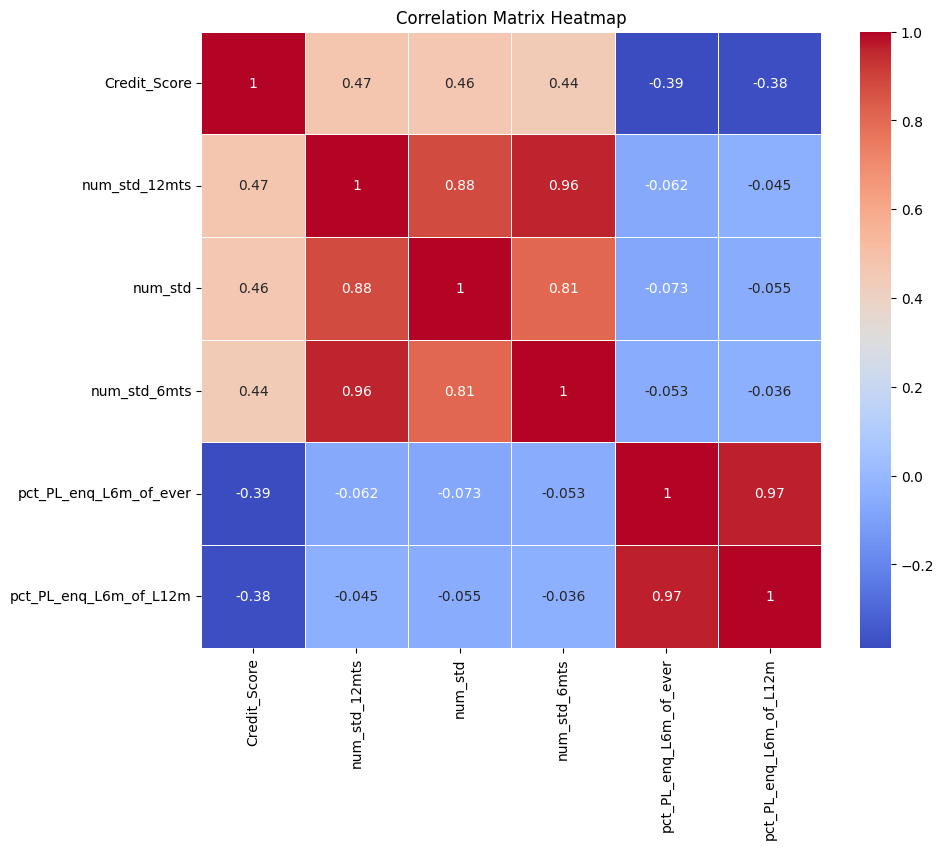

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [32]:
### The highest correlated numerical feature is the number of standard payments in the last 12 months. This is a positive correlation coefficient with a value of 0.96
### The stongest negative correlated feature is the percent enquires into personal loans in the last 6 months to last 6 months

In [33]:
### There is strong multicollinearity in some of the variables (as same measurement but over different time periods)
### e.g. num_std_12_months has a 0.97 correlation with num_std_6_months
### Let's try and remove the multicollinearity

### 5) Multicollinearity

In [34]:
# The below code just removes features that are highly correlated, but this then loses a lot of feature power, so will try PCA

import pandas as pd

hash- flattening the correlation matrix and filter pairs with correlation > 0.8 (standrd value)
high_corr_pairs = corr_matrix.abs().unstack().reset_index()
high_corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.8) & (high_corr_pairs['Variable1'] != high_corr_pairs['Variable2'])]

hash- select one variable from each pair to drop
variables_to_drop = set()
for var1, var2 in high_corr_pairs[['Variable1', 'Variable2']].values:
    if var1 not in variables_to_drop and var2 not in variables_to_drop:
        variables_to_drop.add(var2)

hash- create a new DataFrame without the highly correlated variables
new_df = num_df.drop(columns=variables_to_drop)

print("Variables to drop:", variables_to_drop)
print("New DataFrame:")
print(new_df.head())

## Principle Component Analysis

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)
reduced_df = pca.fit_transform(bank_prepared)

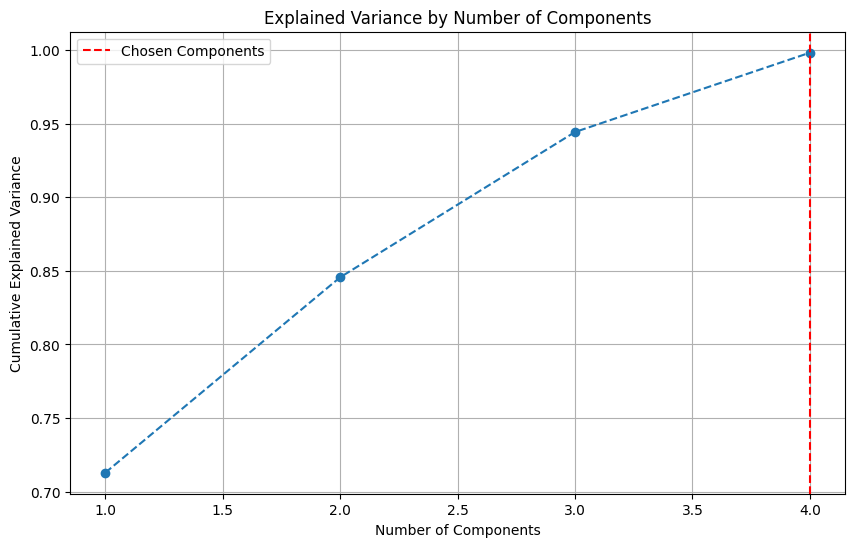

In [36]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.axvline(x=4, color='r', linestyle='--', label='Chosen Components')
plt.legend()
plt.grid(True)
plt.show()

## Modelling

In [37]:
## PCA into 4 dimensions
X_train = reduced_df

In [38]:
y_train = bank_labels

In [39]:
a = pca.explained_variance_ratio_
a.sum()
## We have retained 99.8% of the variance by using three dimensions

0.9981182231236768

In [40]:
## 1 regressor - naive, baseline??

In [41]:
y_train.size

51336

In [42]:
X_train.size

205344

In [43]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error 
from sklearn.dummy import DummyRegressor 

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size=0.2) 

### Dummy Regressor

Mean Squared Error: 409.5109070547381
R-squared: -6.768490662967253e-05


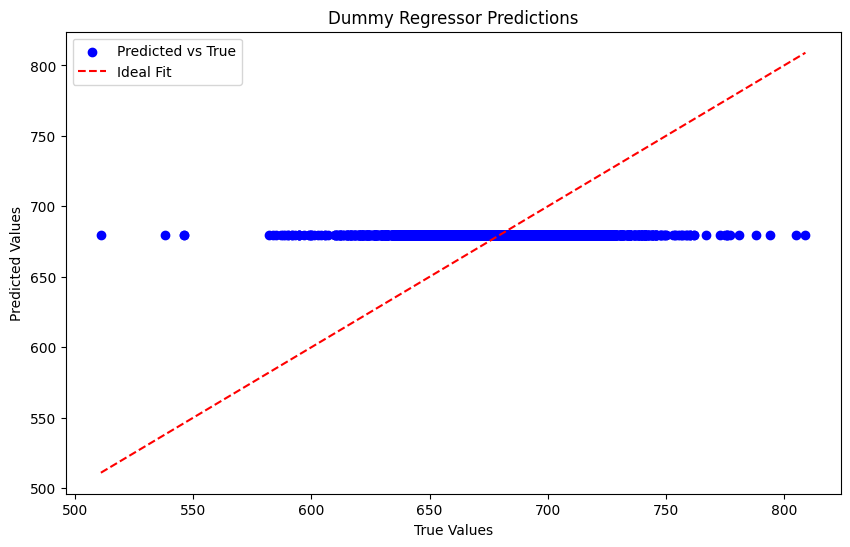

In [45]:
dummy_regressor = DummyRegressor(strategy="mean")

# Fit the model on the training data
dummy_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = dummy_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared metric
r_squared = r2_score(y_val, y_pred)
print(f"R-squared: {r_squared}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Dummy Regressor Predictions')
plt.legend()
plt.show()

### Linear Regression

Mean Squared Error: 395.8397441138796
R-squared: 0.033318698793324275


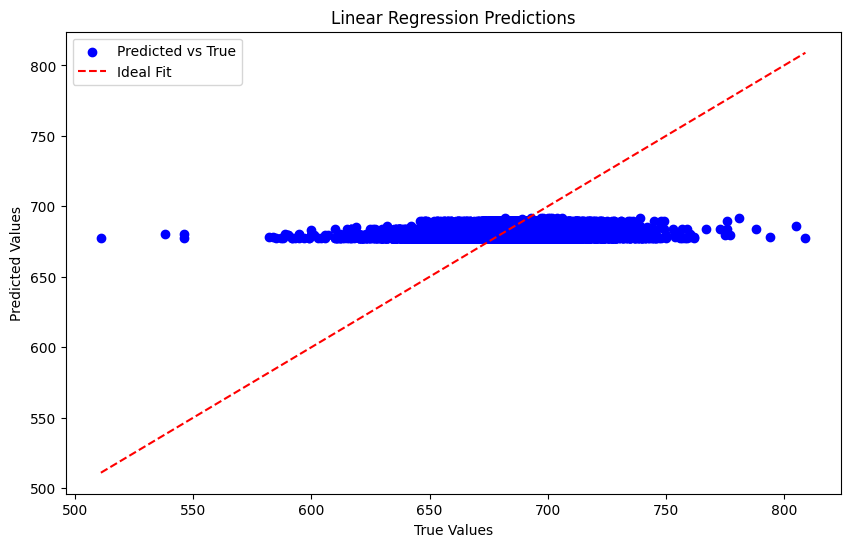

In [46]:
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Fit the model on the training data
linear_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = linear_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared metric
r_squared = r2_score(y_val, y_pred)
print(f"R-squared: {r_squared}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

### Random Forest Regressor

Mean Squared Error: 300.6024907077357


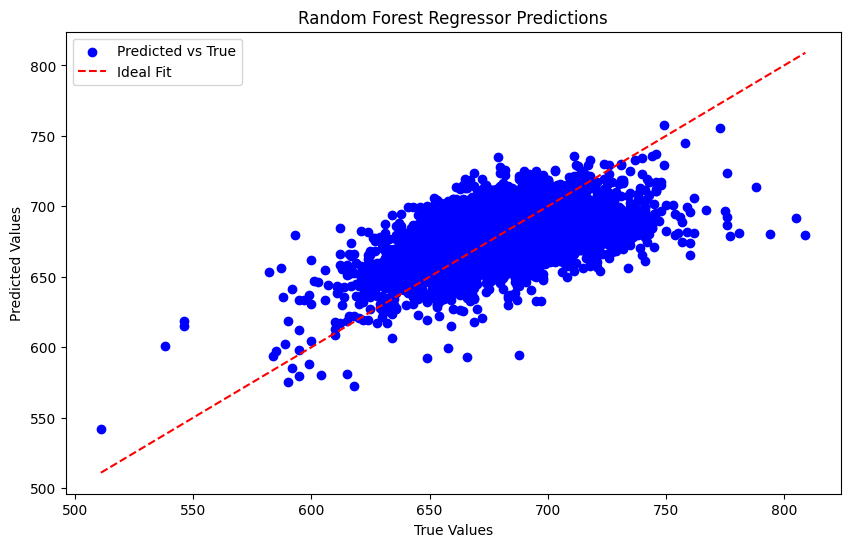

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = rf_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor Predictions')
plt.legend()
plt.show()

#### Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [58]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
#{'bootstrap': True,
# 'max_depth': 80,
# 'max_features': 3,
# 'min_samples_leaf': 5,
# 'min_samples_split': 12,
# 'n_estimators': 100}
best_grid = grid_search.best_estimator_ 
rmse = mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse}")
grid_accuracy = rmse
##print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   7.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   3.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   3.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=  13.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   4.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   8.5s


In [62]:
best_params = grid_search.best_params_

Mean Squared Error: 270.16739977227655


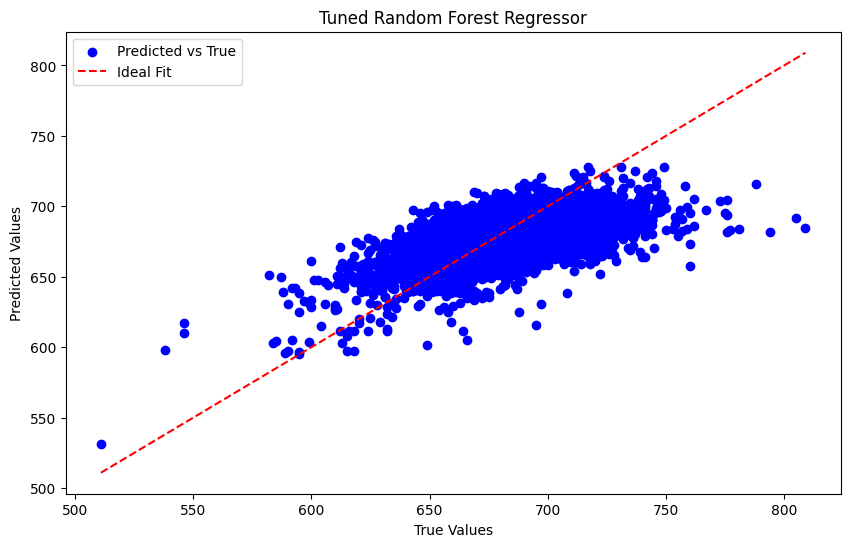

In [69]:
# Create a new Random Forest Regressor with the best hyperparameters
tuned_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Train the model on your training data
tuned_rf_model.fit(X_train, y_train)

# Predict and evaluate the model on your test data
y_pred = tuned_rf_model.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Tuned Random Forest Regressor')
plt.legend()
plt.show()

In [65]:
print(rmse)

16.436769748715122


#### Learning Curves

### Support Vector Regressor

Mean Squared Error: 394.6841003963109


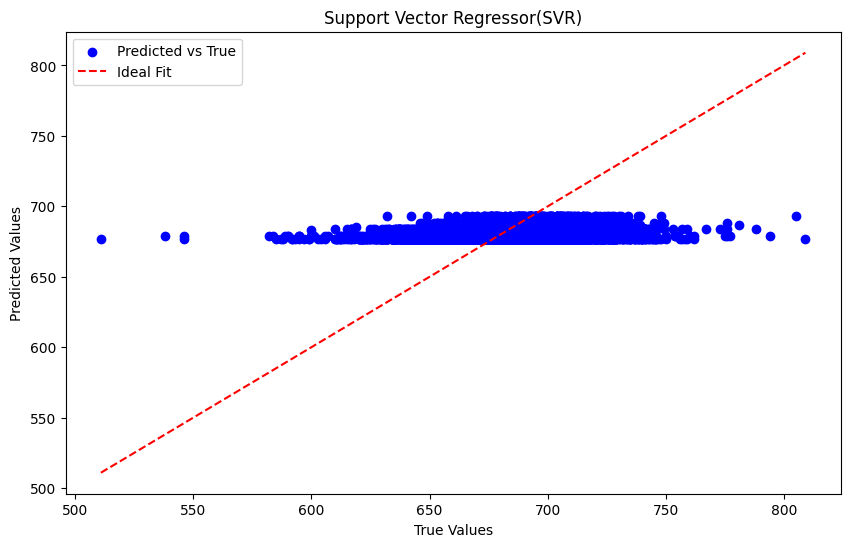

In [67]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svr_regressor = SVR(kernel='rbf')

# Fit the model on the training data
svr_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = svr_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regressor(SVR)')
plt.legend()
plt.show()

In [68]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.150 total time= 1.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.151 total time= 1.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.153 total time= 1.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.181 total time= 1.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.162 total time= 1.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.163 total time= 1.1min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.167 total time= 1.1min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.169 total time= 1.1min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.197 total time= 1.1min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.180 total time= 1.1min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.159 total time= 1.1min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [70]:
best_svr_params = grid.best_params_
best_grid = grid.best_estimator_ 
rmse = mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse}")

RMSE: 270.16739977227655


Mean Squared Error: 296.1477193148884


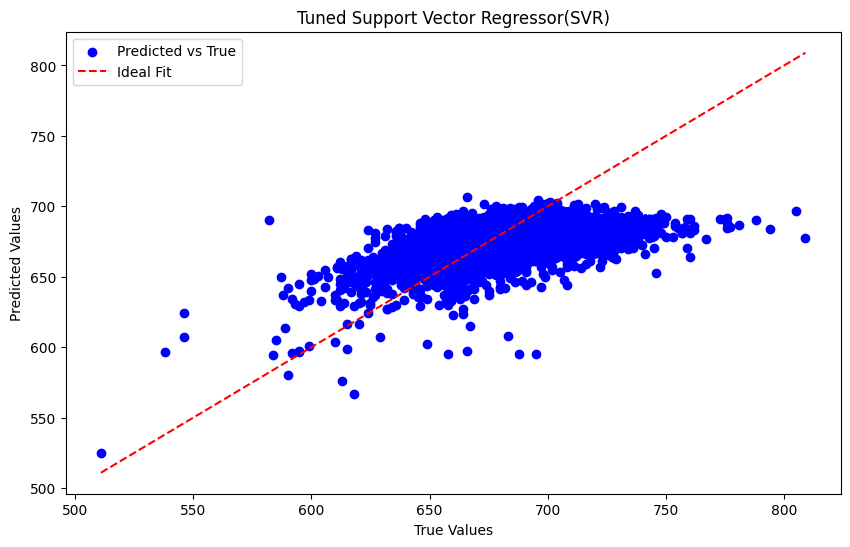

In [73]:
# Initialize the Support Vector Regressor
tuned_svr_regressor = SVR(**best_svr_params)

# Fit the model on the training data
tuned_svr_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = tuned_svr_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Tuned Support Vector Regressor(SVR)')
plt.legend()
plt.show()

### Gradient Boosting Regressor

Mean Squared Error: 289.14569400621434


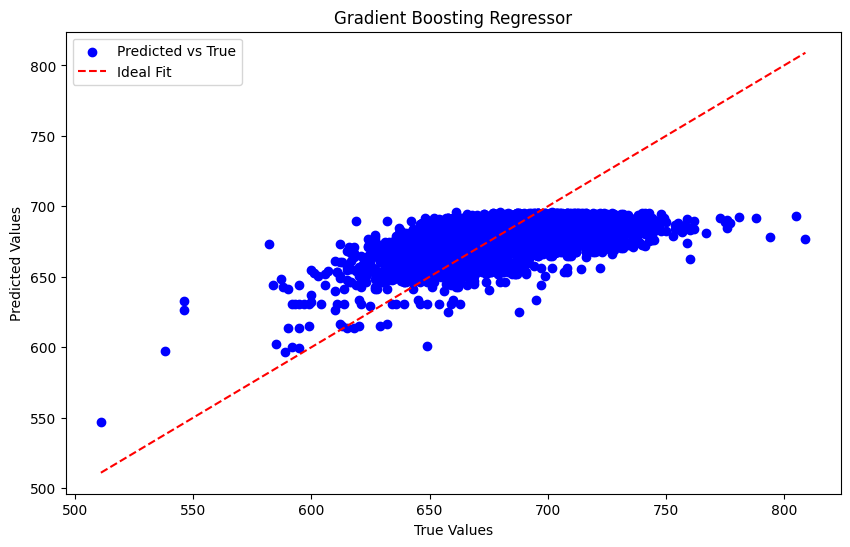

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=69)

# Fit the model on the training data
gb_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = gb_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regressor')
plt.legend()
plt.show()

In [ ]:
# Define the hyperparameters and their values
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
 
# Initialize the Gradient Boosting model
tuned_gb_regressor = GradientBoostingRegressor()
 
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tuned_gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
 
# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/Users/maxsmith/env_bank/lib/python3.8

In [ ]:
best_GBR_params = grid_search.best_params_
best_GBR_grid = grid_search.best_estimator_ 
rmse = mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse}")

In [ ]:
# Initialize the Support Vector Regressor
tuned_gbr_regressor = GradientBoostingClassifier(**best_GBR_params, random_state=69)

# Fit the model on the training data
tuned_gbr_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = tuned_gbr_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Tuned Gradient Boosting Regressor')
plt.legend()
plt.show()

### K-Nearest Neighbors Regresssor

Mean Squared Error: 297.71447993767043


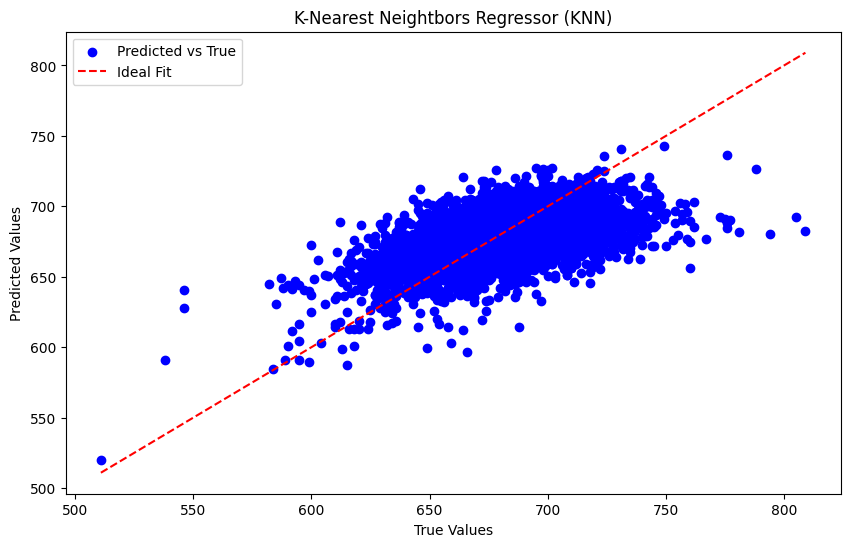

In [79]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the K-Neighbors Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = knn_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neightbors Regressor (KNN)')
plt.legend()
plt.show()

In [81]:
# Define the hyperparameters and their values
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv=3, n_jobs = -1)

# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/maxsmith/env_bank/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/Users/maxsmith/env_bank/lib/python3.8

KeyboardInterrupt: 

In [ ]:
best_knn_params = grid_search.best_params_
best_knn_grid = grid_search.best_estimator_ 
rmse = mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse}")

In [ ]:
# Initialize the Support Vector Regressor
tuned_knn_regressor = KNeighborsRegressor(**best_GBR_params, random_state=69)

# Fit the model on the training data
tuned_knn_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = tuned_knn_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Tuned K-Nearest Neighbors Regressor')
plt.legend()
plt.show()

### XGBoost Regressor

Mean Squared Error: 269.35314573167506


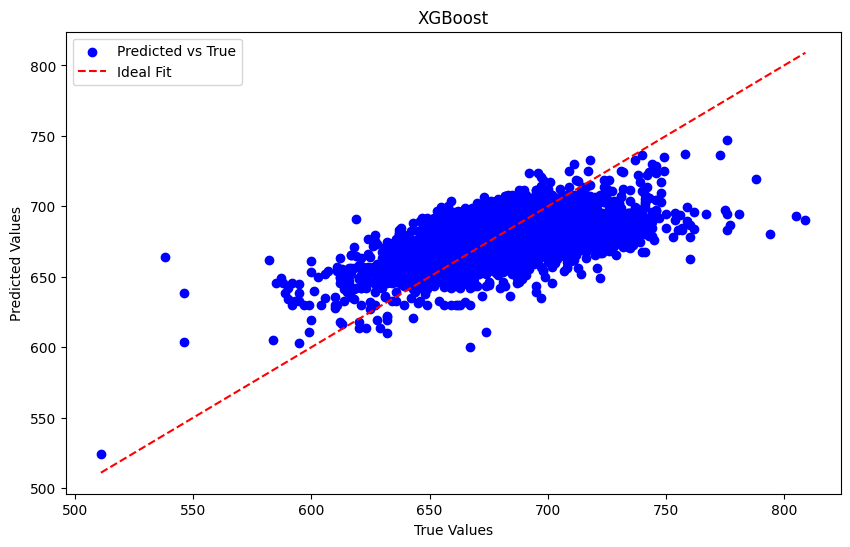

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = xgb_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost')
plt.legend()
plt.show()

In [96]:
# Define the model
xgbr = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters and their values
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 1.0}
Best cross-validation score:  -277.5095661140101


In [97]:
best_xgbr_params = grid_search.best_params_
best_xgbr_grid = grid_search.best_estimator_ 
rmse = mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse}")

RMSE: 269.35314573167506


Mean Squared Error: 267.81743867022436


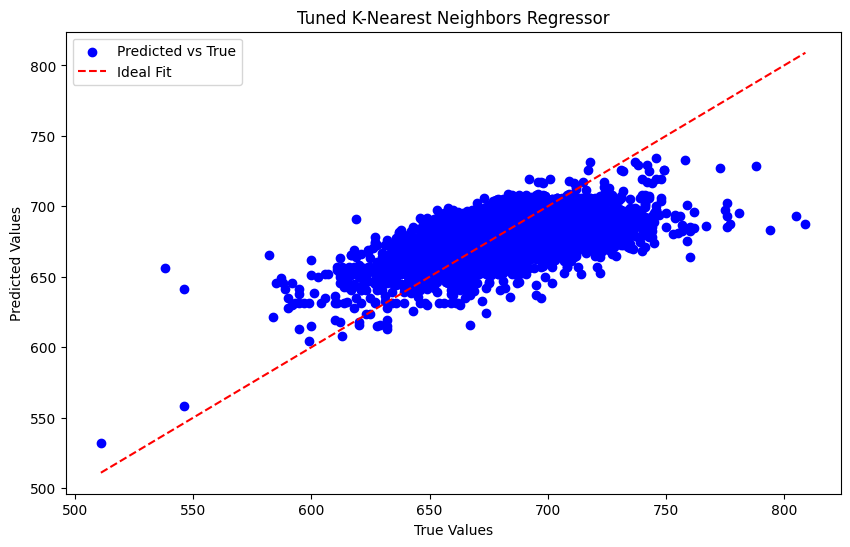

In [100]:
# Initialize the Support Vector Regressor
tuned_xgbr_regressor = xgb.XGBRegressor(**best_xgbr_params, random_state=69)

# Fit the model on the training data
tuned_xgbr_regressor.fit(X_train, y_train)

# Predict on the validation data
y_pred = tuned_xgbr_regressor.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted vs True')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Tuned K-Nearest Neighbors Regressor')
plt.legend()
plt.show()

## Cross-Validation

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dummy_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

dummy_rmse_cs_scores = np.sqrt(-scores) 

In [91]:
print(dummy_rmse_cs_scores)

[21.03016443 19.81658956 21.06260353 20.61905248 21.14714627 20.45754901
 20.41468152 20.02907514 20.87854333 20.19548933]


In [ ]:
## Let's make this quicker, easier, and more reproducable

In [101]:
from sklearn.metrics import make_scorer, mean_squared_error

def calculate_rmse_scores(models, X, y, cv=4):
    """
    Calculate RMSE scores for a list of models using cross-validation.

    Parameters:
    models (list): List of tuples (model_name, model_instance)
    X (array-like): Training data features
    y (array-like): Training data target
    cv (int): Number of cross-validation folds

    Returns:
    dict: Dictionary with model names as keys and RMSE scores as values
    """
    rmse_scores = {}
    for model_name, model in models:
        # Define a custom scorer for RMSE
        rmse_scorer = make_scorer(mean_squared_error, squared=False)
        scores = cross_val_score(model, X, y, scoring=rmse_scorer, cv=cv)
        rmse_scores[model_name] = scores
    return rmse_scores

# Example usage:
models = [
    ('Dummy Regressor', dummy_regressor),
    ('Linear Regressor', linear_regressor),
    ('Random Forest Regressor', rf_regressor),
    ('Random Forest Regressor (Tuned)', tuned_rf_model),
    ('SVR Regressor', svr_regressor),
    ('SVR Regressor (Tuned)', tuned_svr_regressor),
    ('Gradient Boosting Regressor', gb_regressor),
    ('KNN Regressor', knn_regressor),
    ('XGBoost Regressor', xgb_regressor),
    ('XGBoost Regressor (Tuned)', tuned_xgbr_regressor)
]

rmse_scores = calculate_rmse_scores(models, X_train, y_train)

# Print RMSE scores for each model
for model_name, scores in rmse_scores.items():
    print(f"{model_name} RMSE scores: {scores}")
    print(f"{model_name} Mean RMSE: {np.mean(scores)}")

Dummy Regressor RMSE scores: [20.5728672  20.90877386 20.31279011 20.48265613]
Dummy Regressor Mean RMSE: 20.569271823532564
Linear Regressor RMSE scores: [20.30132476 20.61362515 19.94940541 20.08628525]
Linear Regressor Mean RMSE: 20.237660145374434
Random Forest Regressor RMSE scores: [17.84677573 17.7215374  17.5794751  17.6045335 ]
Random Forest Regressor Mean RMSE: 17.688080433759776
Random Forest Regressor (Tuned) RMSE scores: [16.81833364 16.86302857 16.62406176 16.5815758 ]
Random Forest Regressor (Tuned) Mean RMSE: 16.72174994371645
SVR Regressor RMSE scores: [20.28683509 20.58970538 19.92963188 20.07510206]
SVR Regressor Mean RMSE: 20.220318602571755
SVR Regressor (Tuned) RMSE scores: [17.50762298 17.82344852 17.20832269 17.23774385]
SVR Regressor (Tuned) Mean RMSE: 17.44428451012718
Gradient Boosting Regressor RMSE scores: [17.28880575 17.58998635 17.10593616 17.13867138]
Gradient Boosting Regressor Mean RMSE: 17.280849910514117
KNN Regressor RMSE scores: [17.63554744 17.57

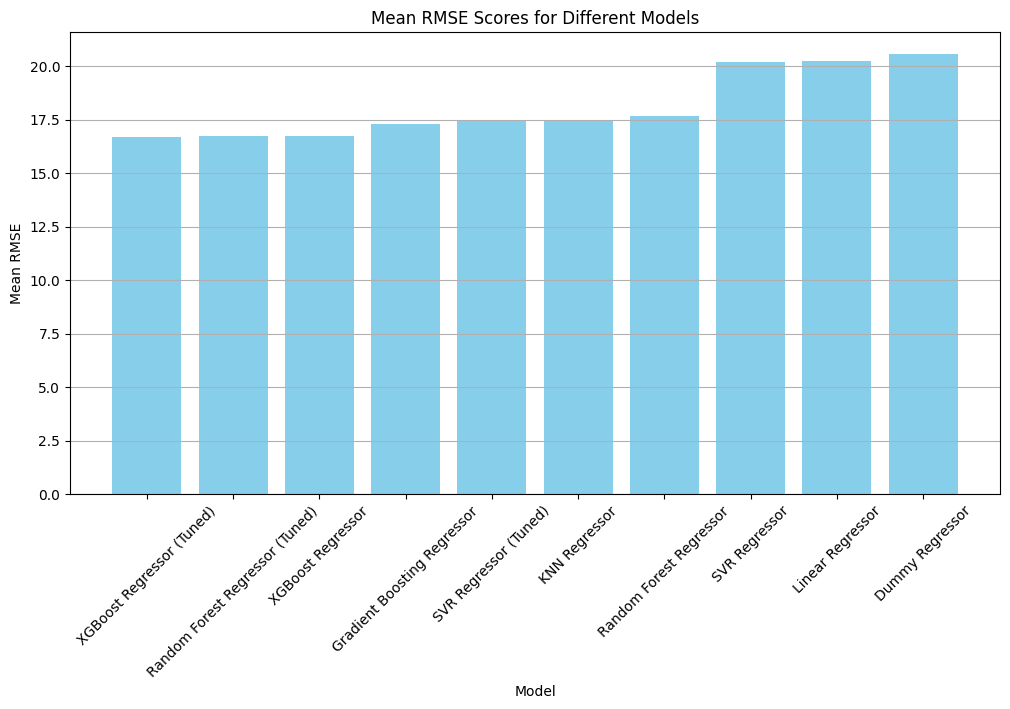

In [104]:
# Extract model names and their mean RMSE scores
model_names = list(rmse_scores.keys())
mean_rmse_scores = [scores.mean() for scores in rmse_scores.values()]

# Pair model names with their mean RMSE scores and sort them
sorted_pairs = sorted(zip(mean_rmse_scores, model_names))

# Unzip the sorted pairs back into separate lists
sorted_mean_rmse_scores, sorted_model_names = zip(*sorted_pairs)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_model_names, sorted_mean_rmse_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE Scores for Different Models')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

### Ensemble Stacking Model

In [106]:
from sklearn.ensemble import StackingRegressor

# List of base models
base_models = [
    ('rf', tuned_rf_model),
    ('svr', tuned_svr_regressor),
    ('gb', gb_regressor),
    ('knn', knn_regressor),
    ('xgb', tuned_xgbr_regressor)
]

# Define the meta-model
meta_model = LinearRegression()

# Create the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_regressor.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = stacking_regressor.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Stacking Regressor RMSE: {rmse}")

Stacking Regressor RMSE: 16.174872464249216


In [108]:
## As the difference in accuracy is negligable and Random Forest have strong explanatory power, I am going to use the Tuned RF model as the final model

final_model = tuned_rf_model

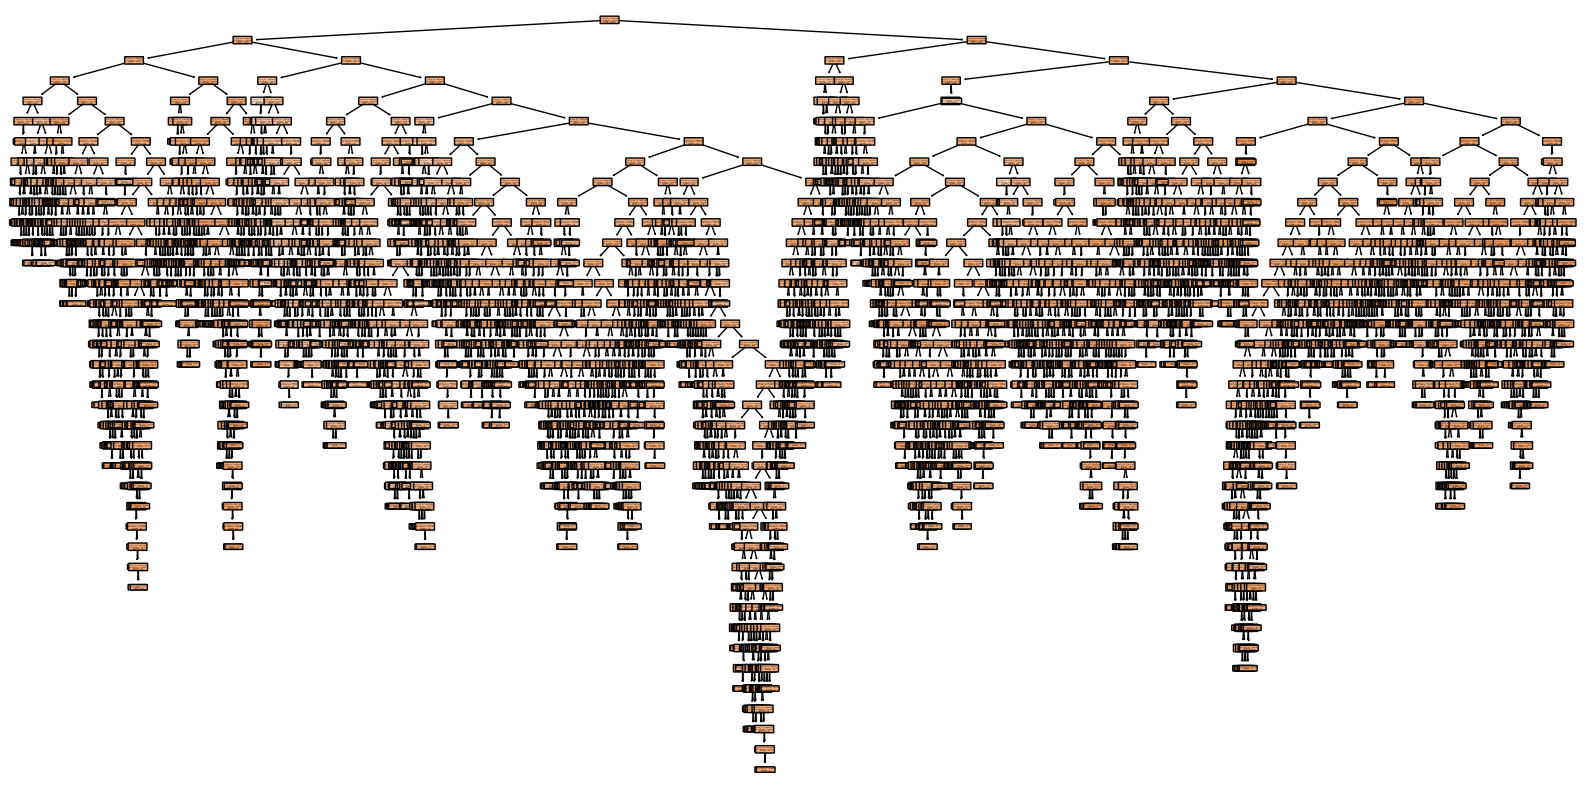

In [115]:
from sklearn.tree import plot_tree
import pydotplus
from IPython.display import Image

# Extract a single tree from the forest
tree = tuned_rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=[f'feature_{i}' for i in range(X.shape[1])], filled=True, rounded=True)
plt.show()

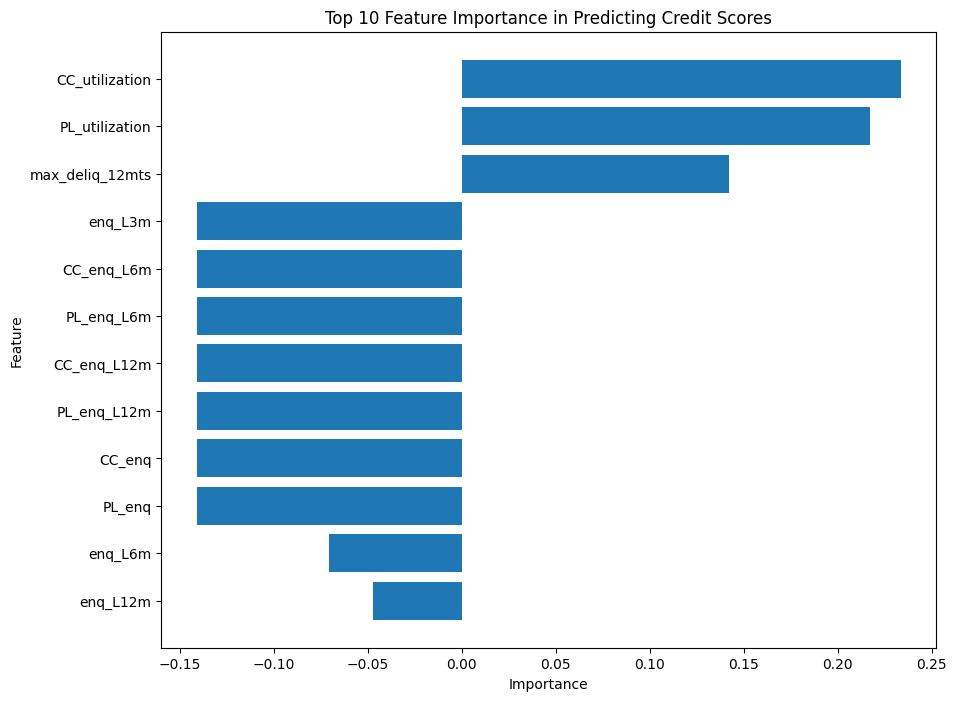

In [109]:
# Get feature importances
feature_importances = final_model.feature_importances_

# Inverse transform the PCA components to the original feature space
pca_components = pca.components_
original_feature_importances = np.dot(pca_components.T, feature_importances)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': bank_prepared.columns,
    'Importance': original_feature_importances
})

# Sort the DataFrame by absolute importance and select the top 10 features
importance_df['Abs_Importance'] = importance_df['Importance'].abs()
top_10_importance_df = importance_df.sort_values(by='Abs_Importance', ascending=False).head(12)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_10_importance_df['Feature'], top_10_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance in Predicting Credit Scores')
plt.gca().invert_yaxis()
plt.show()

Pos--
PL_Utilisation
CC_Utilisation
max_deliq_12_mts

Neg--
Pl and CC enquires 

Visualise...!

Go back to question... Questions to Investigate
What factors most influence credit scores?
Analyze the importance of different features in predicting credit scores.